In [ ]:
import pandas as pd
df = pd.read_csv("/content/malware_classification_dataset_cleaned (2).csv")
df.head()


,file_name,family,obfuscation,api_calls_count,entropy,suspicious_api_calls,label
0,file_100177.exe,Worm,Metamorphism,336,4.87,RegSetValue,Malware
1,file_100425.doc,Ransomware,Packing,230,7.04,RegSetValue,Malware
2,file_100519.doc,Spyware,Metamorphism,148,5.72,ReadFile,Malware
3,file_100599.js,Ransomware,Polymorphism,19,4.00,WriteFile,Benign
4,file_100884.zip,Adware,Packing,462,4.27,WriteFile,Malware


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.read_csv("/content/malware_classification_dataset_cleaned (2).csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_name             4000 non-null   object 
 1   family                4000 non-null   object 
 2   obfuscation           3235 non-null   object 
 3   api_calls_count       4000 non-null   int64  
 4   entropy               4000 non-null   float64
 5   suspicious_api_calls  4000 non-null   object 
 6   label                 4000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 218.9+ KB


,api_calls_count,entropy
count,4000.000000,4000.000000
mean,253.657750,5.759140
std,142.572649,1.292099
min,10.000000,3.500000
25%,128.000000,4.630000
50%,250.000000,5.760000
75%,376.000000,6.880000
max,500.000000,8.000000


In [ ]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

<Axes: xlabel='label', ylabel='count'>

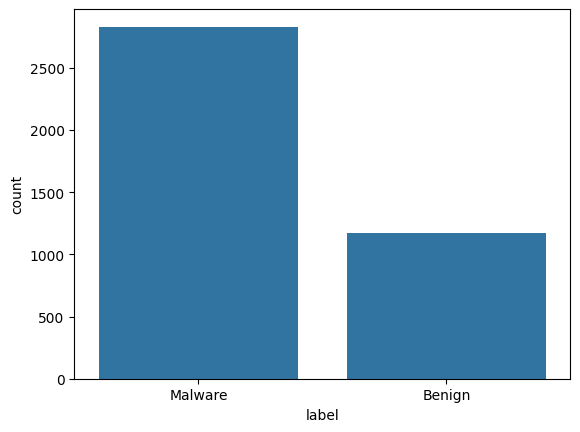

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)


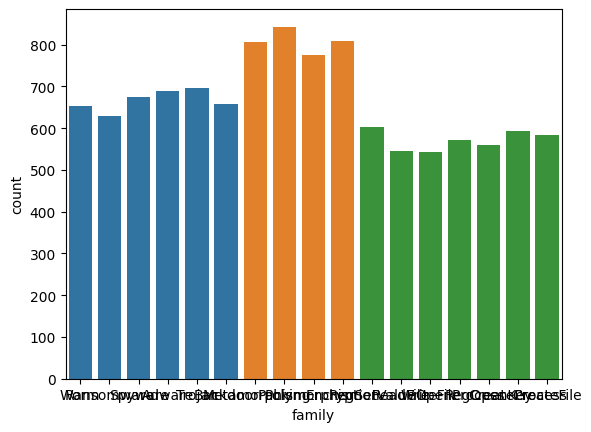

In [ ]:
for col in ['family', 'obfuscation', 'suspicious_api_calls']:
    sns.countplot(x=col, data=df)


<Axes: >

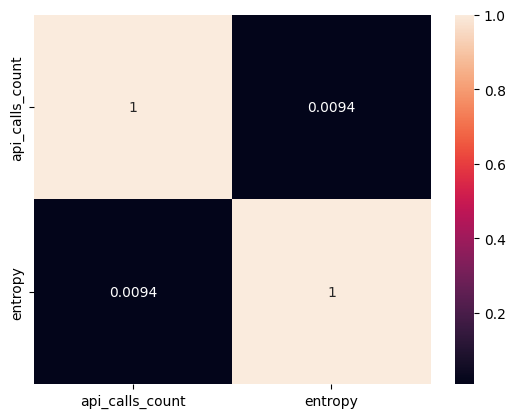

In [ ]:
import seaborn as sns
import pandas as pd

numerical_features = df.select_dtypes(include=['number']).columns
sns.heatmap(df[numerical_features].corr(), annot=True)

<Axes: xlabel='label', ylabel='entropy'>

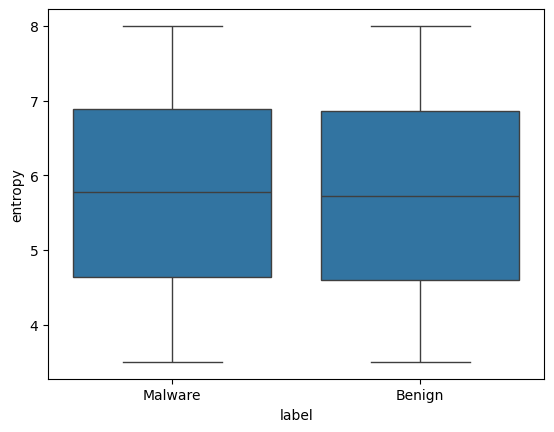

In [ ]:
sns.boxplot(x='label', y='entropy', data=df)


<Axes: ylabel='None'>

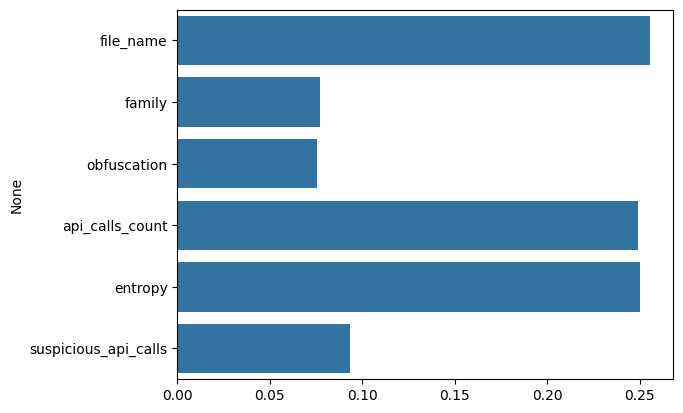

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


X = df.drop('label', axis=1)
y = df['label']


encoder = LabelEncoder()


for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test


model = RandomForestClassifier()
model.fit(X_train, y_train)


feature_importances = model.feature_importances_
feature_names = X_train.columns


sns.barplot(x=feature_importances, y=feature_names)

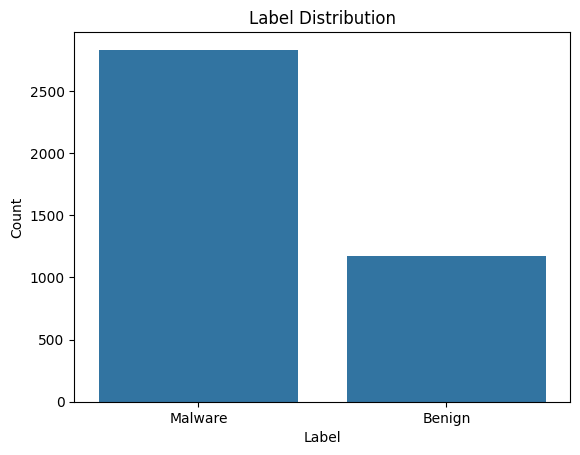

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


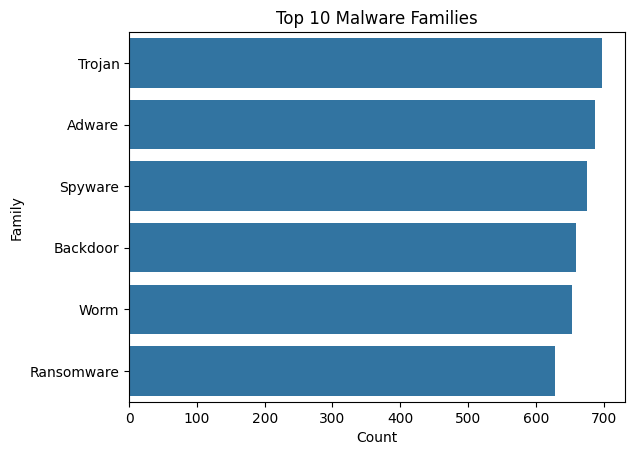

In [ ]:
family_counts = df['family'].value_counts().head(10)
sns.barplot(x=family_counts.values, y=family_counts.index)
plt.title("Top 10 Malware Families")
plt.xlabel("Count")
plt.ylabel("Family")
plt.show()


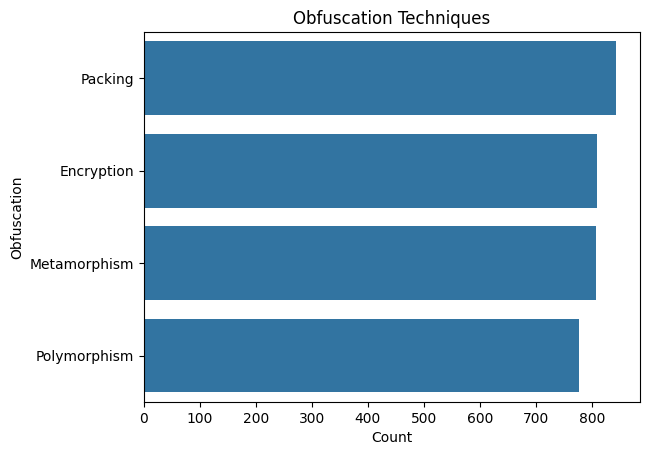

In [ ]:
obfuscation_counts = df['obfuscation'].value_counts()
sns.countplot(y='obfuscation', data=df, order=obfuscation_counts.index)
plt.title("Obfuscation Techniques")
plt.xlabel("Count")
plt.ylabel("Obfuscation")
plt.show()


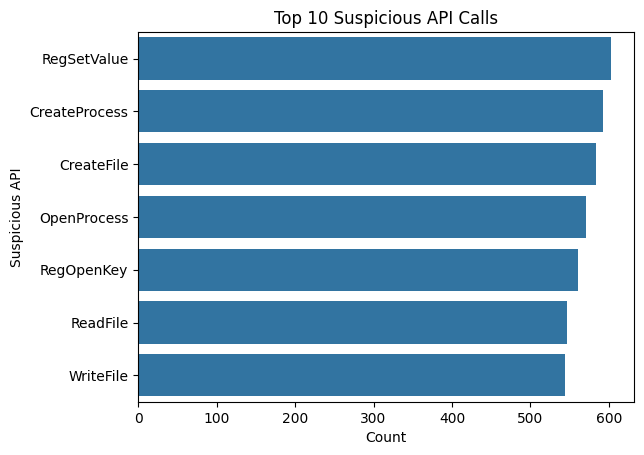

In [ ]:
api_counts = df['suspicious_api_calls'].value_counts().head(10)
sns.barplot(x=api_counts.values, y=api_counts.index)
plt.title("Top 10 Suspicious API Calls")
plt.xlabel("Count")
plt.ylabel("Suspicious API")
plt.show()


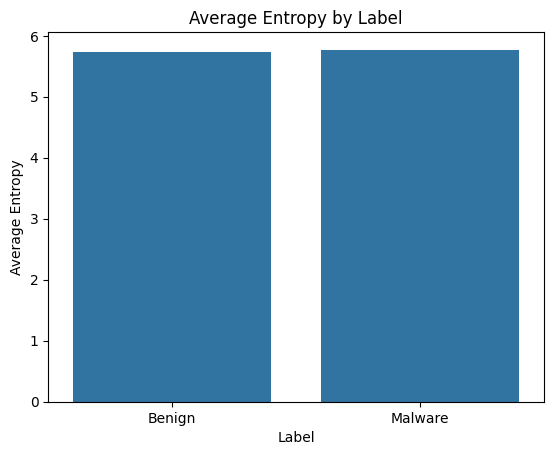

In [ ]:
entropy_by_label = df.groupby('label')['entropy'].mean()
sns.barplot(x=entropy_by_label.index, y=entropy_by_label.values)
plt.title("Average Entropy by Label")
plt.xlabel("Label")
plt.ylabel("Average Entropy")
plt.show()


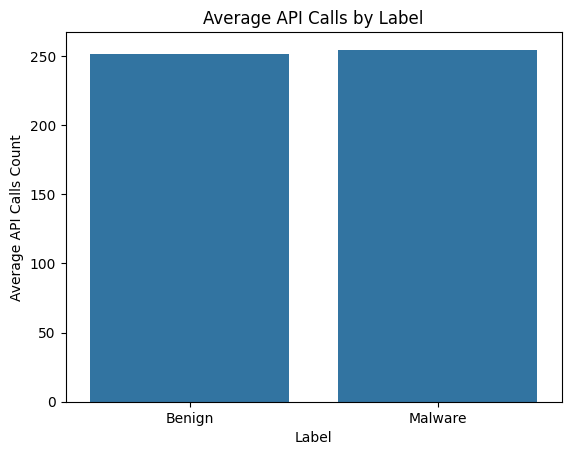

In [ ]:
api_calls_by_label = df.groupby('label')['api_calls_count'].mean()
sns.barplot(x=api_calls_by_label.index, y=api_calls_by_label.values)
plt.title("Average API Calls by Label")
plt.xlabel("Label")
plt.ylabel("Average API Calls Count")
plt.show()


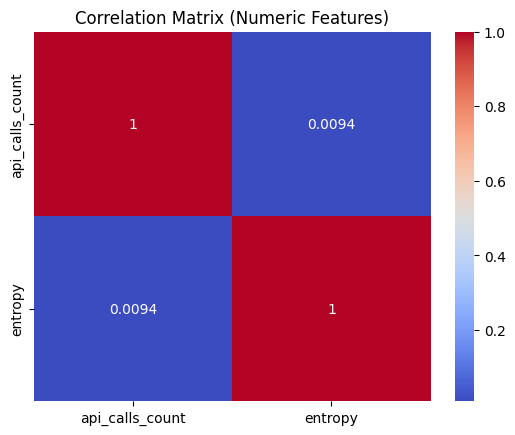

In [ ]:
correlation_matrix = df[['api_calls_count', 'entropy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


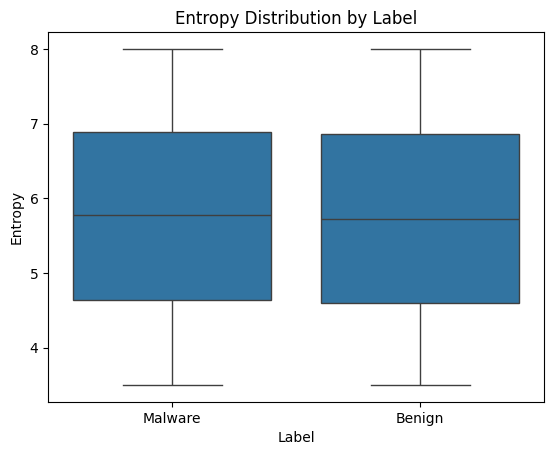

In [ ]:
sns.boxplot(x='label', y='entropy', data=df)
plt.title("Entropy Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Entropy")
plt.show()


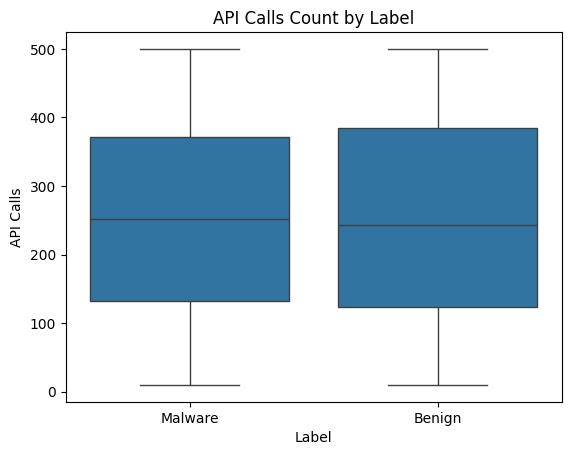

In [ ]:
sns.boxplot(x='label', y='api_calls_count', data=df)
plt.title("API Calls Count by Label")
plt.xlabel("Label")
plt.ylabel("API Calls")
plt.show()


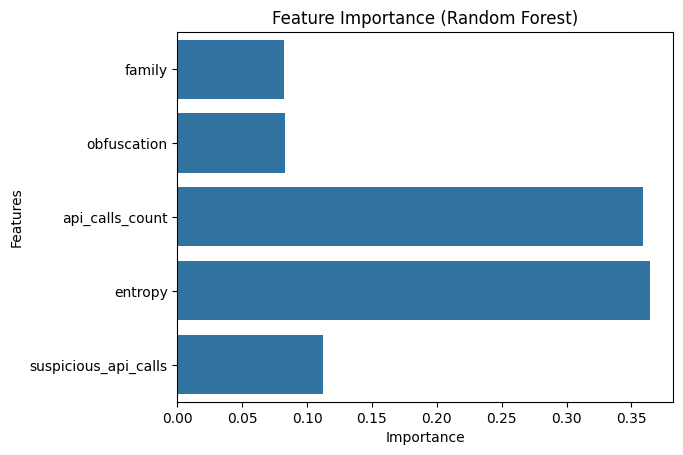

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
for col in ['family', 'obfuscation', 'suspicious_api_calls', 'label']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(['file_name', 'label'], axis=1)
y = df_encoded['label']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
import pandas as pd


class_grouped = df.groupby('label')[['entropy', 'api_calls_count']].mean()
print("1. Average Feature Values by Class:\n", class_grouped, "\n")


pivot_family_api = pd.pivot_table(df, values='api_calls_count',
                                  index='family',
                                  columns='label',
                                  aggfunc='mean')
print("2. Average API Calls per Family per Label:\n", pivot_family_api, "\n")

obf_label_freq = pd.pivot_table(df, values='file_name',
                                index='obfuscation',
                                columns='label',
                                aggfunc='count',
                                fill_value=0)
print("3. Frequency of Obfuscation Types by Label:\n", obf_label_freq, "\n")


pivot_entropy_api = pd.pivot_table(df, values='entropy',
                                   index='suspicious_api_calls',
                                   columns='label',
                                   aggfunc='mean')
print("4. Average Entropy by Suspicious API and Label:\n", pivot_entropy_api, "\n")


1. Average Feature Values by Class:
           entropy  api_calls_count
label                             
Benign   5.728991       251.381523
Malware  5.771590       254.597669 

2. Average API Calls per Family per Label:
 label           Benign     Malware
family                            
Adware      230.502793  252.734774
Backdoor    248.135678  261.397826
Ransomware  250.528409  248.553097
Spyware     261.882682  247.790323
Trojan      258.513274  262.840764
Worm        256.342857  254.702032 

3. Frequency of Obfuscation Types by Label:
 label         Benign  Malware
obfuscation                  
Encryption       246      563
Metamorphism     221      586
Packing          256      587
Polymorphism     224      552 

4. Average Entropy by Suspicious API and Label:
 label                   Benign   Malware
suspicious_api_calls                    
CreateFile            5.738050  5.725412
CreateProcess         5.752626  5.650966
OpenProcess           5.882327  5.751845
ReadFile      

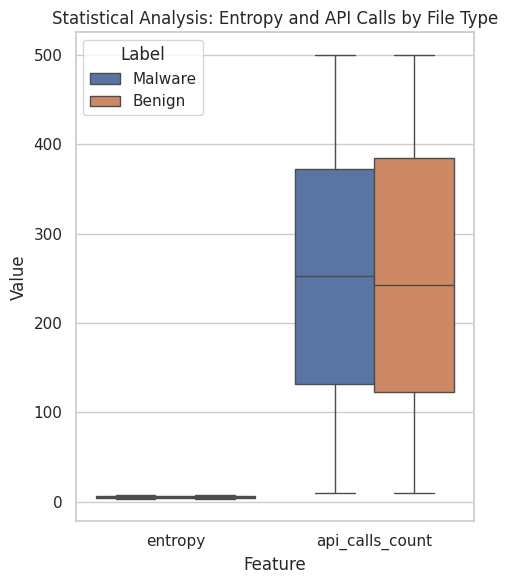

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("malware_classification_dataset_cleaned (2).csv")


sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))

df_melted = df.melt(id_vars='label', value_vars=['entropy', 'api_calls_count'],
                    var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='label', data=df_melted)
plt.title("Statistical Analysis: Entropy and API Calls by File Type")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


Model Performance:
Accuracy: 0.64
Precision: 0.69
Recall: 0.87
F1 Score: 0.77
ROC-AUC Score: 0.48


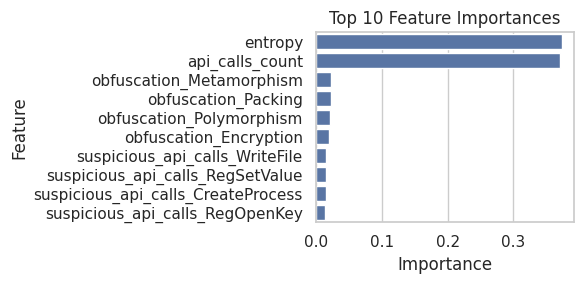

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("malware_classification_dataset_cleaned (2).csv")


df_encoded = pd.get_dummies(df, columns=['obfuscation', 'family', 'suspicious_api_calls'])

X = df_encoded.drop(columns=['label', 'file_name'])
y = df_encoded['label'].map({'Benign': 0, 'Malware': 1})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")


importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<ipython-input-40-3d741ec31307>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_api.values, y=family_api.index, palette='Blues_d')


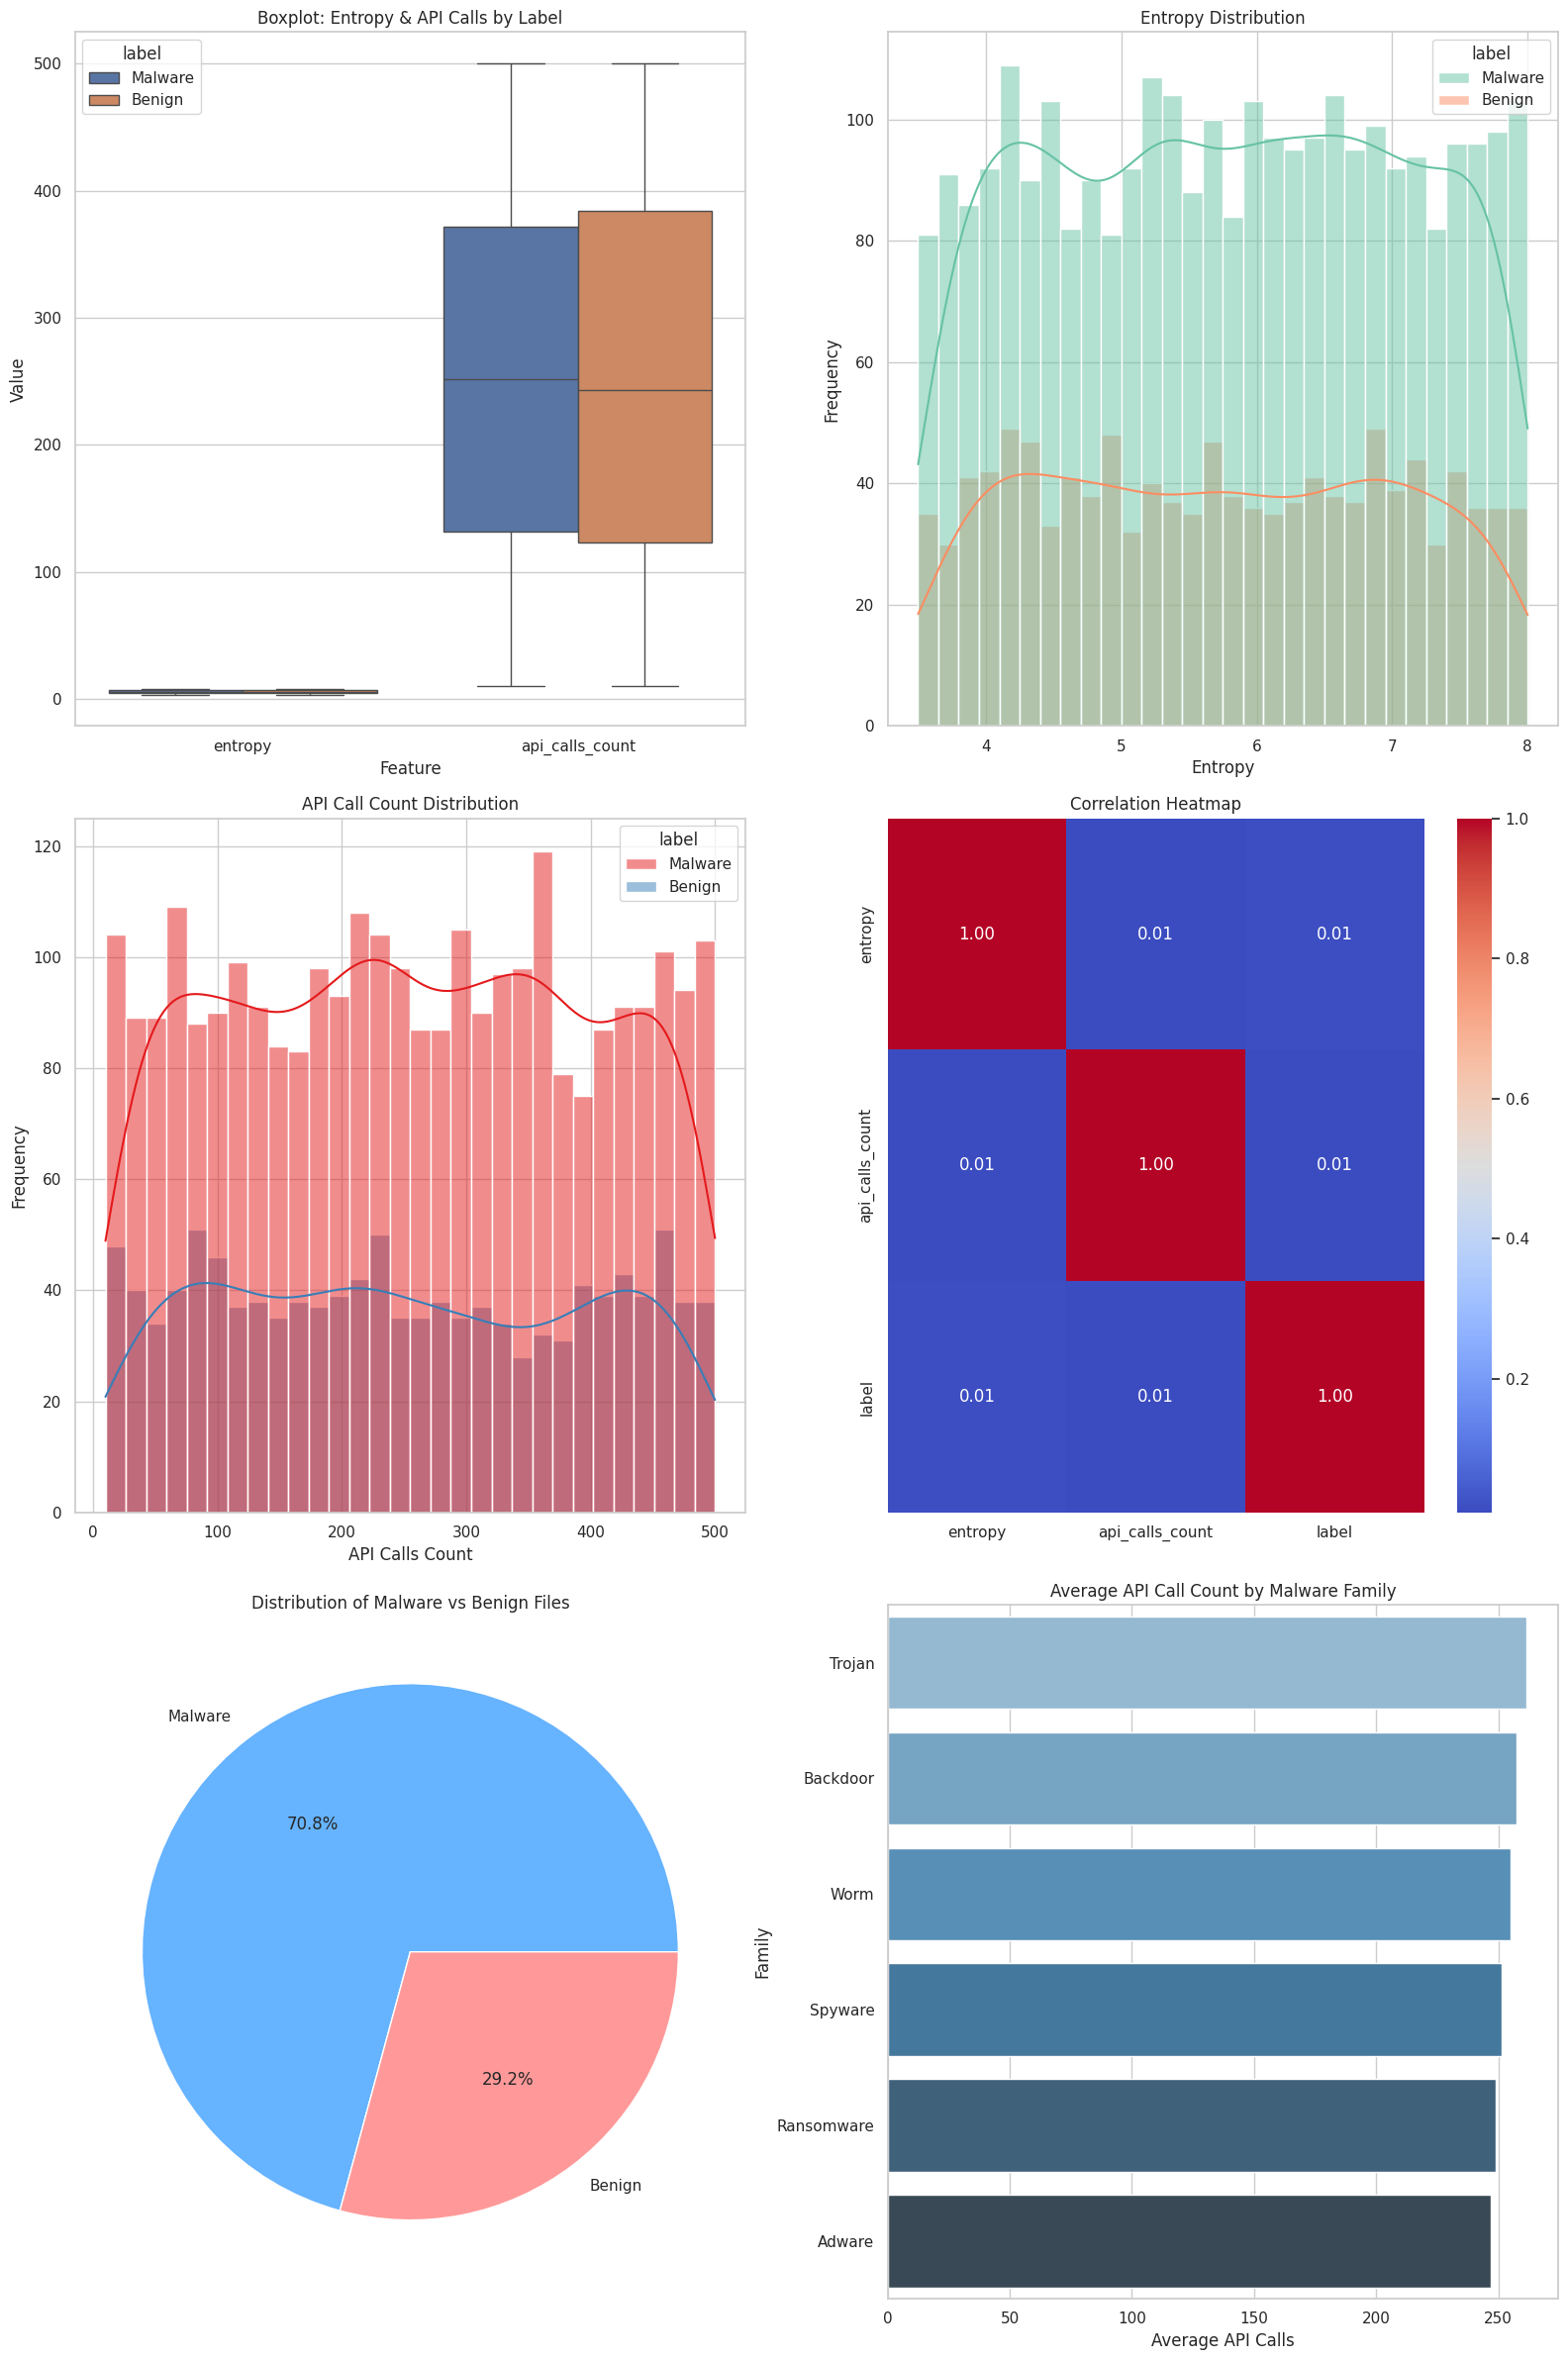

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("malware_classification_dataset_cleaned (2).csv")

sns.set(style="whitegrid")
plt.figure(figsize=(16, 24))

plt.subplot(3, 2, 1)
df_melted = df.melt(id_vars='label', value_vars=['entropy', 'api_calls_count'],
                    var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='label', data=df_melted)
plt.title("Boxplot: Entropy & API Calls by Label")
plt.xlabel("Feature")
plt.ylabel("Value")

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='entropy', hue='label', kde=True, bins=30, palette='Set2')
plt.title("Entropy Distribution")
plt.xlabel("Entropy")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
sns.histplot(data=df, x='api_calls_count', hue='label', kde=True, bins=30, palette='Set1')
plt.title("API Call Count Distribution")
plt.xlabel("API Calls Count")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
df_corr = df.copy()
df_corr['label'] = df_corr['label'].map({'Benign': 0, 'Malware': 1})
corr_matrix = df_corr[['entropy', 'api_calls_count', 'label']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.subplot(3, 2, 5)
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Distribution of Malware vs Benign Files")

if 'family' in df.columns:
    plt.subplot(3, 2, 6)
    family_api = df.groupby('family')['api_calls_count'].mean().sort_values(ascending=False)
    sns.barplot(x=family_api.values, y=family_api.index, palette='Blues_d')
    plt.title("Average API Call Count by Malware Family")
    plt.xlabel("Average API Calls")
    plt.ylabel("Family")

plt.tight_layout()
plt.show()


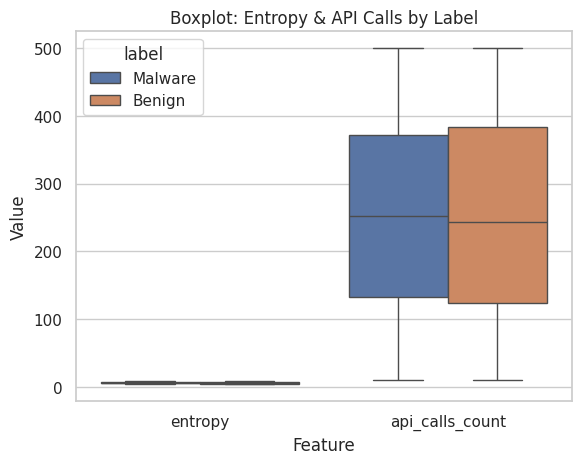

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("malware_classification_dataset_cleaned (2).csv")
sns.set(style="whitegrid")
df_melted = df.melt(id_vars='label', value_vars=['entropy', 'api_calls_count'],
                    var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='label', data=df_melted)
plt.title("Boxplot: Entropy & API Calls by Label")
plt.show()


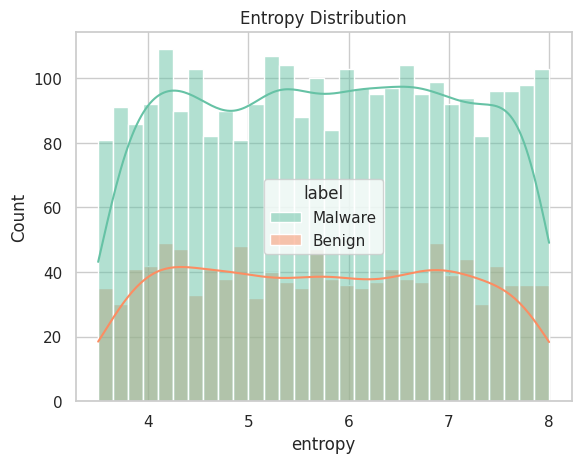

In [ ]:
sns.histplot(data=df, x='entropy', hue='label', kde=True, bins=30, palette='Set2')
plt.title("Entropy Distribution")
plt.show()


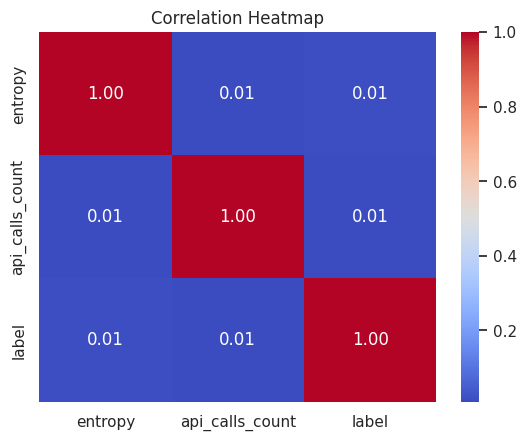

In [ ]:
df_corr = df.copy()
df_corr['label'] = df_corr['label'].map({'Benign': 0, 'Malware': 1})
corr_matrix = df_corr[['entropy', 'api_calls_count', 'label']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


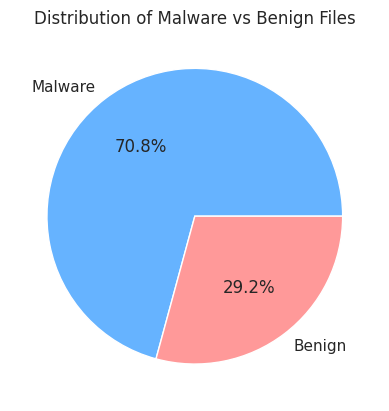

In [ ]:
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Distribution of Malware vs Benign Files")
plt.show()


<ipython-input-45-e0da1ec48181>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_api.values, y=family_api.index, palette='Blues_d')


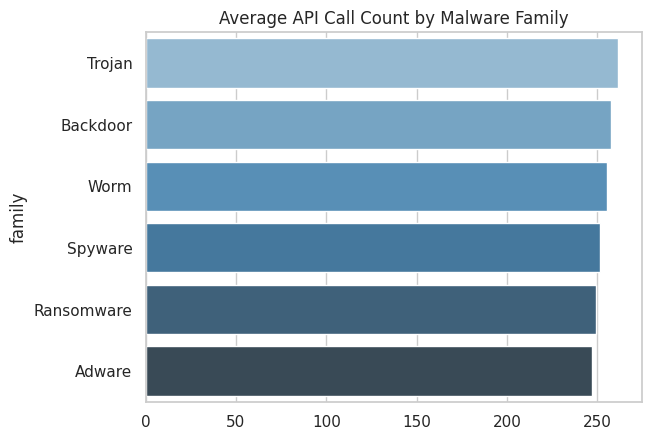

In [ ]:
if 'family' in df.columns:
    family_api = df.groupby('family')['api_calls_count'].mean().sort_values(ascending=False)
    sns.barplot(x=family_api.values, y=family_api.index, palette='Blues_d')
    plt.title("Average API Call Count by Malware Family")
    plt.show()
